# Pandas exercise（30个）


---

In [2]:
import pandas as pd

### Step 1.从目录下加载数据文件chipotle.tsv. 导入数据集，读取数据并存为一个名叫chipo的数据框，显示前六行数据

In [2]:
#your code



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98


### Step2.显示出全部的列名称,并显示数据集的索引

In [3]:
#全部的列名称
#your code

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
#数据集的索引
#your code

RangeIndex(start=0, stop=4622, step=1)

### Step3. 订单数最多的商品是什么？（查看前五行）

In [5]:
#your code


,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


### Step4.从choice_description列观察订单最多的项目是?（查看前五行）

In [6]:
#your code

choice_description
[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
dtype: int64

### Step5.在该数据集对应的时期内，一共有多少订单？

In [7]:
#your code

1834

### Step6.将 item price转成float类型 设字段名为price

In [8]:
#your code


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: price, Length: 4622, dtype: float64

### Step7.在该数据集对应的时期内，收入(revenue)是多少？
新增sub_price列用于计算revenue sub_price = quantity * price

In [9]:
#your code


39237.02

### Step8.每一单(order)对应的平均总价是多少？

In [10]:
#your code


21.39423118865867

### Step9.一共有多少种不同的商品被售出？

In [11]:
#your code


50

### Step10.只选取item_name这一列

In [12]:
#your code

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

### Step11.该数据集中一共有多少列(columns)

In [13]:
#your code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   price               4622 non-null   float64
 5   sub_price           4622 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 216.8+ KB


### Step12.将数据集中的列 quantity, item_name,和price单独存为一个名叫item的数据框，查看前五行数据

In [14]:
#your code


,quantity,item_name,price
0,1,Chips and Fresh Tomato Salsa,2.39
1,1,Izze,3.39
2,1,Nantucket Nectar,3.39
3,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,Chicken Bowl,16.98


### Step13.对数据框item按照先price再item_name进行排序（查看前五行）

In [15]:
#your code

,quantity,item_name,price
34,1,Bottled Water,1.09
87,1,Bottled Water,1.09
318,1,Bottled Water,1.09
701,1,Bottled Water,1.09
780,1,Bottled Water,1.09


### Step14.找到进球数price超过25的球队数据

In [16]:
#your code

,order_id,quantity,item_name,choice_description,price,sub_price
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
1255,511,3,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",27.75,83.25
1514,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25,78.75
3334,1336,3,Steak Bowl,"[Tomatillo Green Chili (Medium), [Rice, Black ...",26.07,78.21
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25


### Step15.选取除了最后1列之外的全部列

In [17]:
#your code

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Step 16.  从目录中加载数据appl_1980_2014.csv. 导入数据集，读取数据并存为一个名叫apple的数据框

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#your code

### Step17. 查看前五行的内容和每一列的数据类型

In [19]:
#your code

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [20]:
# your code


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 18.数据框中有缺失值吗？

In [21]:
#your code

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [22]:
# your code


False

### Step 19.将列Volume的第10到19行设置为缺失值

In [23]:
#your code


,Date,Open,High,Low,Close,Volume,Adj Close
10,2014-06-23,91.32,91.62,90.60,90.83,NaN,90.83
11,2014-06-20,91.85,92.55,90.90,90.91,NaN,90.91
12,2014-06-19,92.29,92.30,91.34,91.86,NaN,91.86
13,2014-06-18,92.27,92.29,91.35,92.18,NaN,92.18
14,2014-06-17,92.31,92.70,91.80,92.08,NaN,92.08
15,2014-06-16,91.51,92.75,91.45,92.20,NaN,92.20
16,2014-06-13,92.20,92.44,90.88,91.28,NaN,91.28
17,2014-06-12,94.04,94.12,91.90,92.29,NaN,92.29
18,2014-06-11,94.13,94.76,93.47,93.86,NaN,93.86
19,2014-06-10,94.73,95.05,93.57,94.25,NaN,94.25


### Step 20.将缺失值全部替换为1.0

In [24]:
#your code

### Step 21.删除列Volume

In [25]:
#your code


,Date,Open,High,Low,Close,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,93.52
...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,0.42


### Step 22.计算Open平均值

In [26]:
#your code

98.59392557590077

### Step 23.将Date这个列转换为datetime类型

In [27]:
#your code

### Step 24.将Date设置为索引

In [28]:
#your code

### Step 25.是否有重复的日期？

In [29]:
#your code


False

### Step 26.将index设置为升序（显示前五行）

In [30]:
#your code

,Open,High,Low,Close,Adj Close
Date,,,,,
1980-12-12,28.75,28.87,28.75,28.75,0.45
1980-12-15,27.38,27.38,27.25,27.25,0.42
1980-12-16,25.37,25.37,25.25,25.25,0.39
1980-12-17,25.87,26.00,25.87,25.87,0.40
1980-12-18,26.63,26.75,26.63,26.63,0.41


### Step 27.找到每个月的最后一个交易日(business day)（显示前五行） 
（yyyy-mm算做一个月）

In [31]:
#your code


,Date,Open,High,Low,Close,Adj Close,yyyy-mm
0,1980-12-31,34.25,34.25,34.13,34.13,0.53,1980-12
1,1981-01-31,28.50,28.50,28.25,28.25,0.44,1981-01
2,1981-02-28,26.50,26.75,26.50,26.50,0.41,1981-02
3,1981-03-31,24.75,24.75,24.50,24.50,0.38,1981-03
4,1981-04-30,28.38,28.62,28.38,28.38,0.44,1981-04


### Step 28.数据集中最早的日期和最晚的日期相差多少天？

In [32]:
#your code

12261

### Step 29.在数据中一共有多少个月？

In [33]:
#your code

404

### Step 30.按照时间顺序可视化Adj Close值

<Axes: xlabel='Date'>

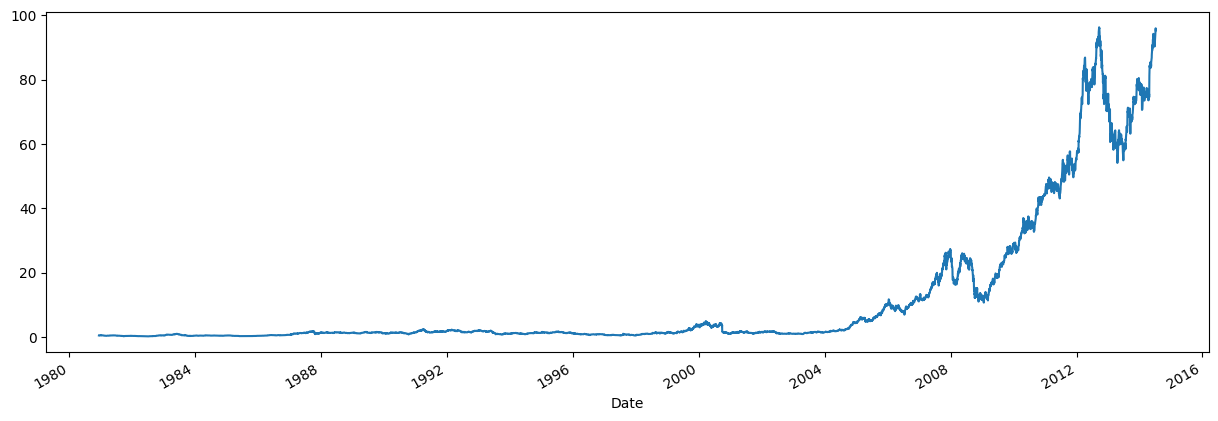

In [34]:
#your code